# *Conceptual*

## 1. Discuss the differences between LDA and QDA in terms of their main assumptions about classes, decision boundaries, number of samples, and overfitting

The assumptions about the trainingdata are that there could be a dependency between the attributes used for the prediction, but the values of these attributes are normally distributed, when connected to the response class. That means, that all attribute values associated with a specific response class $c_i$, with $i\in[1,...,K]$ for K classes, show a normal distribution $\mathcal{N}(\mu_i, \sigma_i^2)$. For LDA, however, there is another condition that the covariances of the predictor attributes are the same for all classes: $\forall i,j \in [1,...K]: \sigma_i = \sigma_j$, so the distribution mentioned above is special for LDA, since there is only one value for the variance: $\mathcal{N}(\mu_i, \sigma^2)$ . QDA drops this assumption, since the covariances of the predictor attributes values associated to different classes can differ.

According to the decision boundary, LDA comes with a linear decision boundary, whereas QDA comes with a non linesar decision boundary. However, since LDA and QDA are special cases of the Naive Bayes classification, one can calcuate the probability of the response class instead of the discriminant. Therefore, we can choose a specific decision boundary, to reduce some relevant errors (Type I or Type II error). This could make sense, if the different errors come with different costs we have to take into account making prediction. For example it could be more costly making Type I errors, i.e., in a binary classification the ratio of false predictions of the positive class (False-Negative-rate, FN-rate). In this case we could lower the decision boundary to reduce the FN-rate. However, this will increase the Type II error (False-Positive-rate, FP-Rate). So the selection of the decision boundary depends on the specific use case. Anyway, there is no difference between LDA and QDA in terms of the decision boundary.

The number of samples goes together with the aspect of overfitting. In general, ML algorithmis are more likely to get overfitted, the more parameters are involved. Since QDA takes more parameters into account than LDA, QDA is more likely to get overfitted. That QDA comes with more parameters than LDA is caused by the assumption than, in QDA, each groub of predictor attribute values comes with its own covariance. Based on this, it is better to consider QDA only when having a larger sample, than needed for LDA. However, even for LDA the number of samples plays a role. This is (and this holds for both LDA and QDA) because of the relevance of the different means ($\mu$) used for the calculation according to the assumed normal distribution. Since each groub of predictor attribute values associated with a specific class $c_i$ comes with its own $\mu_i$, the sufficient number of samples depends not only on the amount of parameters used, but also on the number of classes to predict ($K$), because one need a representative sample for each of the classes to calculate a representation mean.

## 2. Regarding KNN

### (a) How does the choice of distance metric affect the performance of k-NN classification?
KNN relies on the smallest distances between the new/unknown predictor and the known predictors/observations. Therefore, it doesn't matter which distance metric is used, als long as the metric ensures (1) that positive and negative distances wouldn't cancel out each other and (2) that closer observations are interpreted as closer, i.e., when the distance metric function is increasing and not decresind. For example, a distance metric like $\sum_{i=1}^{p}{\frac{1}{(x-x_i)^2}}$ with $p$ observations and a new predictor $x$ makes no sense here.


### (b) Please also discuss the concept of the curse of dimensionality and its implications for k-NN algorithm
The higher the dimensionality of the oberservations, the higher the complexity of the function. This also hold for k-NN, since it takes all the observations into account. Therefore, the calculation is more complex with more dimensions, since there are more distances that need to be calulated and aggregated. Concluding, there are two main drivers for complexity i k-NN, which affects the time effor during calculation. One is the choice of the k parameter. The other is the amount of predictor attributes (dimensions) used. (Of course, there is a third - the chosen distance metric - but this is not as variable.)
In terms of interpretability there is also a disadvantage with higher dimensionality. However, this is not special for k-NN but holds in general for ML techniques (Accuray-Interpretability-Trade-off). 

# *Practical*

### I: 1. Load the data and get an overview of the data

In [119]:
import pandas as pd

df = pd.read_csv('../data/ISLR/data/Smarket.csv', index_col=0)

I: Display the number of predictors and possible responses and their names

In [120]:
print(df.columns.values)
print(len(df.columns.values))

['Year' 'Lag1' 'Lag2' 'Lag3' 'Lag4' 'Lag5' 'Volume' 'Today' 'Direction']
9


I: Print a statistic summary of the predictors and responses

In [121]:
for c in df.columns.values:
    print(c)
    print(df[c].describe())

Year
count    1250.000000
mean     2003.016000
std         1.409018
min      2001.000000
25%      2002.000000
50%      2003.000000
75%      2004.000000
max      2005.000000
Name: Year, dtype: float64
Lag1
count    1250.000000
mean        0.003834
std         1.136299
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag1, dtype: float64
Lag2
count    1250.000000
mean        0.003919
std         1.136280
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag2, dtype: float64
Lag3
count    1250.000000
mean        0.001716
std         1.138703
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag3, dtype: float64
Lag4
count    1250.000000
mean        0.001636
std         1.138774
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag4, dtype: float64


I: Display the number of data points

In [122]:
len(df)

1250

I: Display the data in a table (subset of rows is sufficient)

In [123]:
df.head(20)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
8,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
10,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


I: Compute the pairwise correlation of the predictors in the data set

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


<Axes: >

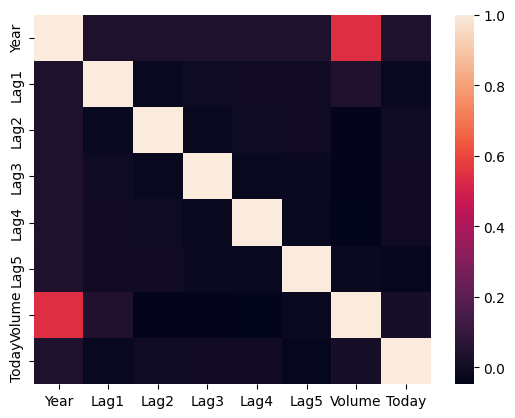

In [124]:
import seaborn as sns
predictors = df.columns[:-1]
correlation = df[predictors].corr()
print(correlation)
sns.heatmap(correlation)

I: Interprete the results

In general, the correleations are very weak. The most values for the pairs are around 0 (very weak positive or negative correlation). There is one exception, i.e., Year and Volume, showing a moderate positive correlation. 

I: Plot the correlated predictors Volume and Year

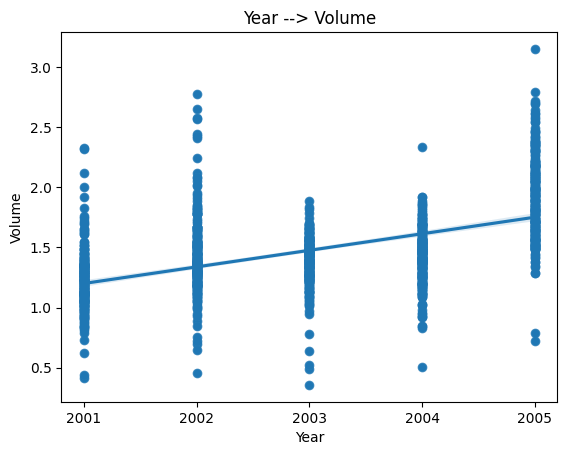

In [125]:
import matplotlib.pyplot as plt

sns.scatterplot(df, x=df['Year'], y=df['Volume'], )
sns.regplot(df, x=df['Year'], y=df['Volume'])
plt.xticks(range(df['Year'].min(), df['Year'].max()+1, 1))
plt.title(f'Year --> Volume')
plt.show()

I: Interprete the results

You can see the positive correlation by the regression line in the plot. However, even the correlation coefficient indicates a moderate positive correlation, the values of the volume are highly spreaded according to a specific year. There are especially some outliers in each of the year.

### I: 2. Perform logistic regressions

I: Fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and Volume

In [126]:
import statsmodels.api as sm
X = df[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y = df['Direction'] == 'Up'

mod1 = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1244
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.93
Date:                Sun, 18 Feb 2024   Deviance:                       1727.9
Time:                        23:18:33   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002650
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0721      0.050     -1.438      0.1

I: Interprete the results

According to the p values, non of the choosen predictor is useful in this case, since all p values are over 5%. Even the whole model is very weak, since the R² value is very low (0.002868).

### I: 3. Use the logistic regression models

I: Predict the probability that the market will go up, given values of the predictors.

In [127]:
pred = mod1.predict(X)
pred

1       0.515030
2       0.488057
3       0.484582
4       0.520219
5       0.517673
          ...   
1246    0.513652
1247    0.511458
1248    0.539304
1249    0.529084
1250    0.521650
Length: 1250, dtype: float64

I: Convert the probabilities to labels

In [128]:
import numpy as np

pred_labels = np.array(['Down'] * len(pred))
pred_labels[pred > 0.5] = "Up"

pred_labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

I: Compute and a confusion maytrix in order to determine how many observations were correctly or incorrectly classified.

In [129]:
from ISLP import confusion_table

print(confusion_table(pred_labels, df['Direction']))
np.mean(pred_labels == df['Direction'])

Truth      Down   Up
Predicted           
Down        100   93
Up          502  555


0.524

I: Interprete the results

I: Recall the low p values of the predictors. Check if a subset of predictors gives better results

In [130]:
X = df[["Lag1", "Lag2"]]
y = df['Direction'] == 'Up'

mod2 = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(mod2.summary())

pred = mod2.predict(X)
pred_labels = np.array(['Down'] * len(pred))
pred_labels[pred > 0.5] = "Up"

print(confusion_table(pred_labels, df['Direction']))
np.mean(pred_labels == df['Direction'])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1248
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -865.06
Date:                Sun, 18 Feb 2024   Deviance:                       1730.1
Time:                        23:18:34   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0008425
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0712      0.050     -1.422      0.1

0.5288

I: Interprete the results

### I: 4. Perform LDA

I: Now perform an LDA on the Smarket data and analyze the result.

classes: [False  True]
means of classes: [[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]
priors probabilities: [0.4816 0.5184]
coefficients: [[-0.07126095 -0.04433204]]


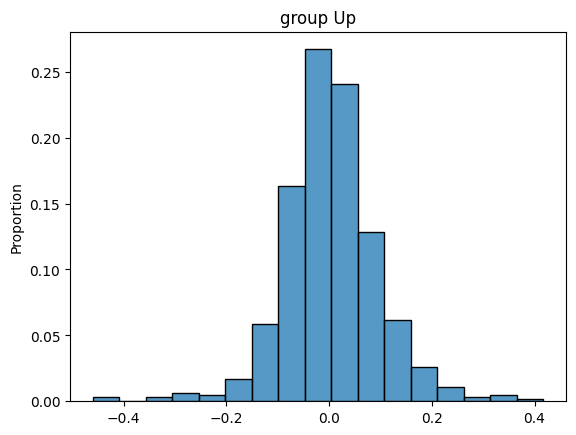

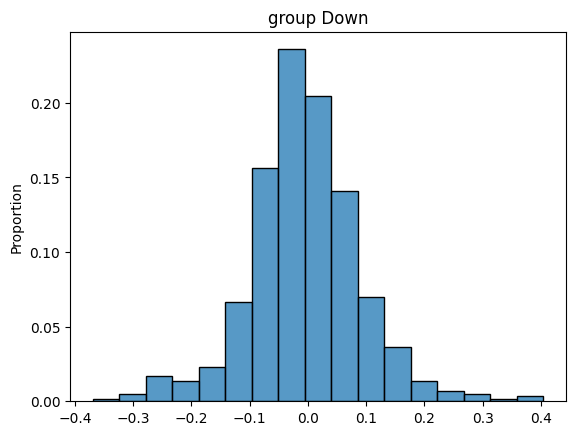

In [131]:
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(store_covariance=True)
mod3 = lda.fit(X,y)


print(f'classes: {mod3.classes_}')
print(f'means of classes: {mod3.means_}')
print(f'priors probabilities: {mod3.priors_}')
print(f'coefficients: {mod3.coef_}')


ups = np.sum(df[df['Direction'] == "Up"][['Lag1', 'Lag2']].values * mod3.coef_ , axis=1)
sns.histplot(ups, stat="proportion", bins=17)
plt.title('group Up')
plt.show()

downs = np.sum(df[df['Direction'] == "Down"][['Lag1', 'Lag2']].values * mod3.coef_ , axis=1)
sns.histplot(downs, stat="proportion", bins=17)
plt.title('group Down')
plt.show()

I: Interprete the results

### I: 5. Use the LDA model

I: Predict the Direction as a response for the selected predictor values using the trained LDA model.

In [132]:
pred = mod3.predict(X)

print(confusion_table(pred, y))

np.mean(pred == y)

Truth      False  True 
Predicted              
False        114    102
True         488    546


0.528

I: Interprete the results

### I: 6. Perform a QDA

I: Now perform a QDA on the Smarket data and analyze the result.

In [133]:
from sklearn. discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


mod4 = QDA(store_covariance=True)
mod4.fit(X, y)

means = pd.DataFrame(data={mod4.classes_[0] : mod4.means_[0],
                           mod4.classes_[1] : mod4.means_[1]},
                           index = X.columns.values)

priors = pd.DataFrame(data={mod4.classes_[0] : [mod4.priors_[0]],
                           mod4.classes_[1] : [mod4.priors_[1]]})

print(priors.head())
print(means.head())

    False   True 
0  0.4816  0.5184
         False     True 
Lag1  0.050686 -0.039691
Lag2  0.032297 -0.022444


I: Interprete the results

### I: 7. Use the QDA model

I: Predict the Direction as a response for the selected predictor values using the trained QDA model. Compute and analyze a confusion matrix.

In [134]:
pred = mod4.predict(X)


print(confusion_table(pred, y))

np.mean(pred == y)

Truth      False  True 
Predicted              
False        109     94
True         493    554


0.5304

I: Interprete the results

### I: 8. Use 𝐾 -Nearest Neighbors Clustering

I: Create a training data set used to find the K nearest neighbors of a data point and their actual classes.

In [135]:
train = df[df['Year'] < 2005]
test = df[df['Year'] >= 2005]
len(test)

252

In [140]:
X_train = train[['Lag1', 'Lag2']]
X_test = test[['Lag1', 'Lag2']]
y_train = train["Direction"]
y_test = test["Direction"]

I: Use and analyze KNN for K=1

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

pred = knn1.predict(X_test)

print(confusion_table(pred, y_test))

np.mean(pred == y_test)

Truth      Down  Up
Predicted          
Down         43  58
Up           68  83


0.5

I: Use and analyze KNN for K=3

In [142]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

pred = knn3.predict(X_test)

print(confusion_table(pred, y_test))

np.mean(pred == y_test)

Truth      Down  Up
Predicted          
Down         48  55
Up           63  86


0.5317460317460317

I: Interprete the results